## Clustering in Python

Let's replicate some of the clustering we did today from KNIME in Python.

The packages we're interested in this week are from scikit-learn. In particular, we're interested in the cluster package. User guide is here: https://scikit-learn.org/stable/modules/clustering.html#clustering

Rather than read the iris file in to Python, it is already a toy dataset in scikit-learn, so we can access it without reading in via pandas. They live in the datasets package. It resturns a Bunch object by default, but we can get at all the bits and pieces wirth attribute names.

In [7]:
import pandas as pd
import sklearn as sk
import sklearn.datasets
import sklearn.cluster

df = pd.read_csv('./iris.csv')
iris = sk.datasets.load_iris()
df

,Row,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [10]:
# iris
iris.data
# iris.target
iris.feature_names
# iris.target_names
# print(iris.DESCR)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Hierarchical clustering

The main way to do this in sklean is by using the AgglomerativeClustering class.

In [7]:
clust = sk.cluster.AgglomerativeClustering(n_clusters=3)
clust.fit(iris.data);

In [8]:
clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

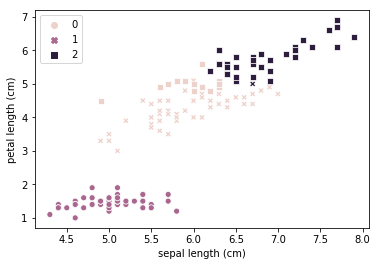

In [9]:
import seaborn as sns
idata = pd.DataFrame(iris.data, columns=iris.feature_names)
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)",
                style=iris.target, hue=clust.labels_, data=idata);

Here we have clustered into three clusters, coloured by the cluster label with the symbol being the actual known species.

We used the default distance measure "ward" but it is instructive to look at the other options.

It's also possible to draw the dendrogram, but I"ll let you investigate that on your own. Hint: the scikit-learn user guide will help you get started.

# k-means clustering

Now, let's do the same thing but with k-means clustering. This time we want to use the KMeans class.

In [10]:
clust = sk.cluster.KMeans(n_clusters=3)
clust.fit(iris.data);

In [20]:
clust.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

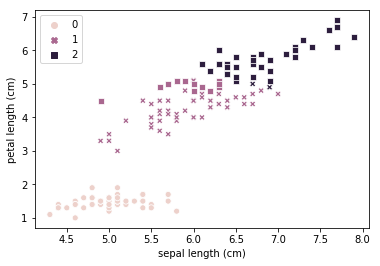

In [21]:
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)",
                style=iris.target, hue=clust.labels_, data=idata);

It's nice to add the centroids to this plot. Here is some yucky code that does just that. You need to use a little bit of matplotlib ... and there are some magic numbers which you could write some nicer code to remove. 

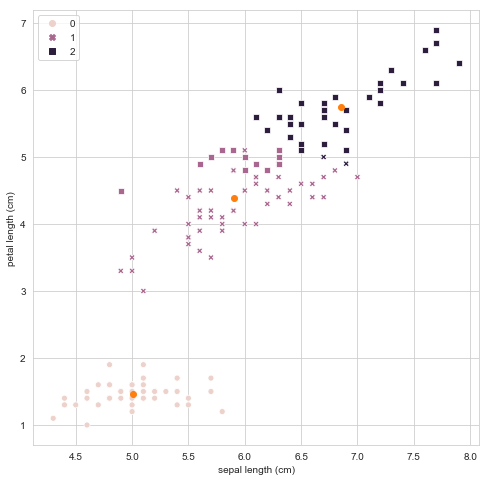

In [31]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid") # not necessary, but makes a grid.

fig, ax = plt.subplots(figsize=(8,8)) # sets size, but not necessary

# this is the scatter plot
plot1 = sns.scatterplot(ax=ax, x="sepal length (cm)", y="petal length (cm)",
                style=iris.target, hue=clust.labels_, data=idata);

# this adds the cluster centres. Note: poor use of magic numbers 0 and 2
plt.scatter(clust.cluster_centers_[:,0], clust.cluster_centers_[:,2],
            marker='o');

# Some other things to try
* Plotting the cluster centres with nicer code?
* Effect of different numbers of clusters?